# Import module

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
[fm.FontProperties(fname=font).get_name() for font in font_list]

In [2]:
from pyproj import Transformer
import pyproj
from shapely.geometry import Point as point
import geopandas as gpd
import folium

In [3]:
plt.rcParams["font.family"] = 'NanumGothic'

In [ ]:
print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  #font 경로 설정
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [21]:
# mpl.rcParams['axes.unicode_minus'] = False

In [6]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.5.3
설치 위치:  /home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치:  /home/dhc4003/.config/matplotlib
캐시 위치:  /home/dhc4003/.cache/matplotlib


In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from geopy.distance import geodesic
from plotnine import *

In [8]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Make dataframe

In [9]:
bike_path='data/'
bike_list=os.listdir(bike_path)
df=[]
for file in bike_list:
    file_path=os.path.join(bike_path,file)
    file_name='bike_'+file_path.split('.')[0][-4:]
    file_name=pd.read_csv(file_path,low_memory=False)
    df.append(file_name)

In [10]:
weather_path='weather/'
weather_list=os.listdir(weather_path)
weather_df=[]
for file in weather_list:
    file_path=os.path.join(weather_path,file)
    file_name='weather_'+file_path.split('.')[0][-4:]
    file_name=pd.read_excel(file_path)
    weather_df.append(file_name)

In [70]:
df_rent_group = df[2].groupby(["대여일자", "대여연월", "대여연도", "대여월", "대여일", "대여요일"])["대여일시"].count()
df_rent_group.head()
df_rent = pd.DataFrame(df_rent_group).reset_index()
df_rent.columns = ["대여일자", "대여연월", "대여연도", 
                   "대여월", "대여일", "대여요일", "대여수"]
df_rent.head()

,대여일자,대여연월,대여연도,대여월,대여일,대여요일,대여수
0,2020-01-01,2020-01,2020,1,1,2,15697
1,2020-01-02,2020-01,2020,1,2,3,27841
2,2020-01-03,2020-01,2020,1,3,4,29654
3,2020-01-04,2020-01,2020,1,4,5,24707
4,2020-01-05,2020-01,2020,1,5,6,22391


In [ ]:
df[2].hist(figsize = (15,15), bins=25)

<AxesSubplot:xlabel='대여일자'>

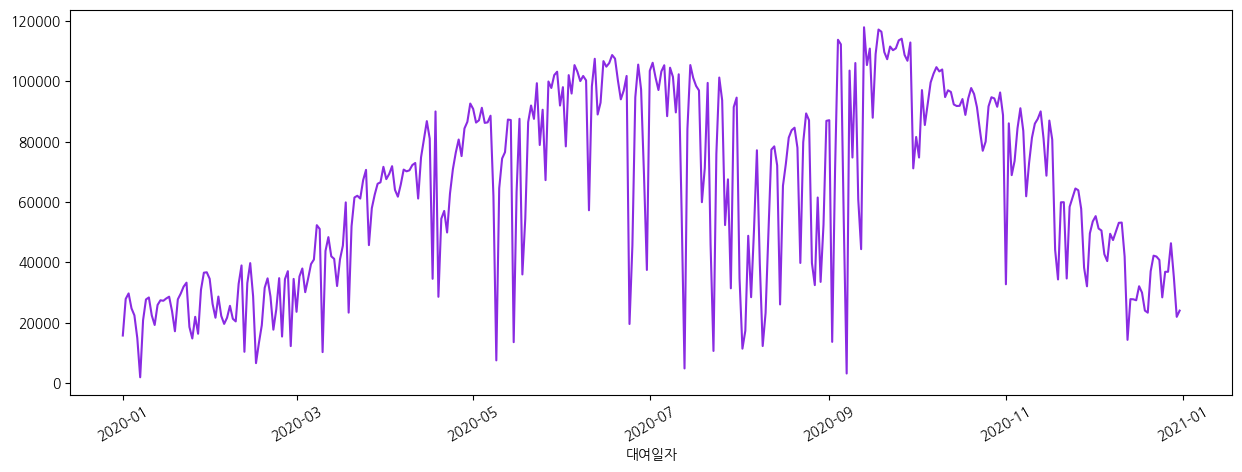

In [18]:
df_rent.groupby('대여일자')['대여수'].mean().plot(rot=30, figsize=(15, 5) ,color='blueviolet')

<AxesSubplot:xlabel='대여연월', ylabel='대여수'>

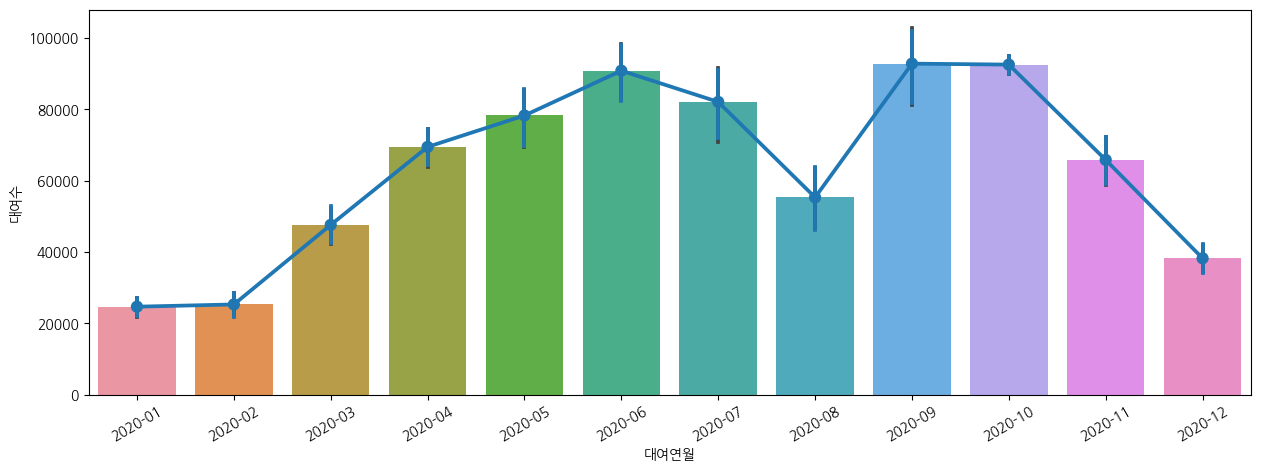

In [19]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
sns.barplot(data=df_rent, x="대여연월", y="대여수")
sns.pointplot(data=df_rent, x="대여연월", y="대여수")

In [20]:
#일자별 대여수 
df_rent_day = df_rent.groupby(["대여일자"])["대여수"].mean()
df_rent_day.head()

대여일자
2020-01-01    15697.0
2020-01-02    27841.0
2020-01-03    29654.0
2020-01-04    24707.0
2020-01-05    22391.0
Name: 대여수, dtype: float64

In [21]:
#월별 대여수 평균 (sum으로 하면 합)
df_rent_month = df_rent.groupby(["대여연월"])["대여수"].mean()
df_rent_month.head()

대여연월
2020-01    24696.677419
2020-02    25319.896552
2020-03    47622.451613
2020-04    69480.466667
2020-05    78288.967742
Name: 대여수, dtype: float64

# 제대로(2022년도)

In [127]:
df_2022=pd.read_csv('/home/dhc4003/ddareung/data/seoul_bike_2022.csv',low_memory=False)

In [128]:
df_2022.head()

,대여일시,대여대여소,대여대여소이름,대여거치대,반납일시,반납대여소,반납대여소이름,반납거치대,이용시간,이용거리
0,2022-01-02 16:02:42,3,중랑센터,0,2022-01-02 16:14:14,540,군자역 7번출구 베스트샵 앞,0,11,2419.63
1,2022-01-06 08:09:11,3,중랑센터,0,2022-01-06 08:19:43,3,중랑센터,0,10,0.00
2,2022-01-11 17:53:40,3,중랑센터,0,2022-01-11 18:05:07,529,장한평역 8번 출구 앞,0,11,1081.14
3,2022-01-17 16:02:21,3,중랑센터,0,2022-01-17 16:07:28,529,장한평역 8번 출구 앞,0,5,0.00
4,2022-01-17 17:57:28,3,중랑센터,0,2022-01-17 18:06:03,529,장한평역 8번 출구 앞,0,8,1121.03


### 보니까 대여소가 102번호 이상인거부터 5855 이하까지 유효

In [151]:
df_2022=df_2022[(df_2022.loc[:,'대여대여소']>=102) & (df_2022.loc[:,'대여대여소']<=5855) & (df_2022.loc[:,'반납대여소']>=102) & (df_2022.loc[:,'반납대여소']<=5855)]
df_2022.tail()

,대여일시,대여대여소,대여대여소이름,대여거치대,반납일시,반납대여소,반납대여소이름,반납거치대,이용시간,이용거리
18274758,2022-06-28 21:21:40,255,도림사거리,0,2022-06-28 21:28:13,5852,대림동현대2차 201동 앞,0,6,846.63
18274759,2022-06-29 02:53:22,281,신동아아파트 앞,99,2022-06-29 02:59:24,5852,대림동현대2차 201동 앞,99,6,620.00
18274760,2022-06-29 10:15:15,1961,신도림테크노근린공원,0,2022-06-29 10:20:31,5852,대림동현대2차 201동 앞,0,5,750.51
18274761,2022-06-29 14:49:09,1961,신도림테크노근린공원,0,2022-06-29 15:49:09,5852,대림동현대2차 201동 앞,0,60,820.00
18274762,2022-06-30 22:24:05,1913,구로리공원,0,2022-06-30 22:34:23,5852,대림동현대2차 201동 앞,0,10,1671.88


In [105]:
df_2022["대여연월"] = df_2022["대여일시"].apply(lambda x : x[:7])
df_2022["대여일시"]=pd.to_datetime(df_2022["대여일시"])

df_2022["대여연도"] = df_2022["대여일시"].dt.year
df_2022["대여월"] = df_2022["대여일시"].dt.month
df_2022["대여일"] = df_2022["대여일시"].dt.day
df_2022["대여시간"] = df_2022["대여일시"].dt.hour
df_2022["대여요일"] = df_2022["대여일시"].dt.dayofweek
df_2022["대여일자"] = df_2022["대여일시"].dt.date

df_2022["반납연월"] = df_2022["반납일시"].apply(lambda x : x[:7])
df_2022["반납일시"]=pd.to_datetime(df_2022["반납일시"])

df_2022["반납일시"]=pd.to_datetime(df_2022["반납일시"])
df_2022["반납연도"] = df_2022["반납일시"].dt.year
df_2022["반납월"] = df_2022["반납일시"].dt.month
df_2022["반납일"] = df_2022["반납일시"].dt.day
df_2022["반납시간"] = df_2022["반납일시"].dt.hour
df_2022["반납요일"] = df_2022["반납일시"].dt.dayofweek
df_2022["반납일자"] = df_2022["반납일시"].dt.date

In [111]:
#요일별 이용량 알아보기
use_by_dayofweek = df_2022.groupby('대여요일').size()
use_by_dayofweek.index = "월 화 수 목 금 토 일".split()
use_by_dayofweek

월    2696927
화    2812707
수    2599107
목    2631359
금    2776369
토    2474742
일    2283619
dtype: int64

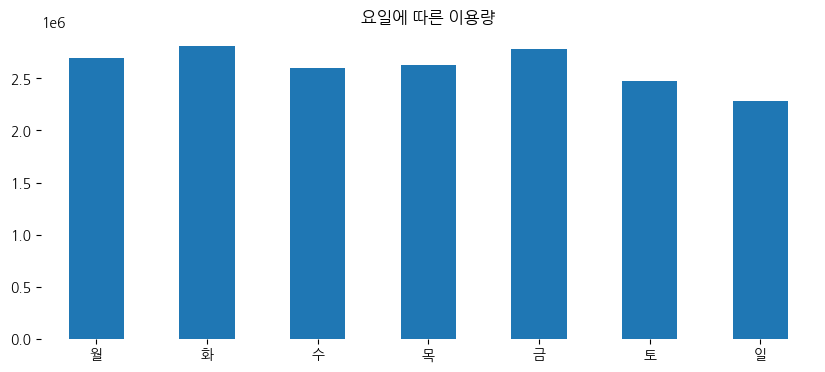

In [114]:
ax = use_by_dayofweek.plot.bar(
    rot=0,
    title="요일에 따른 이용량",
    figsize=(10, 4)
)
ax.set_frame_on(False)

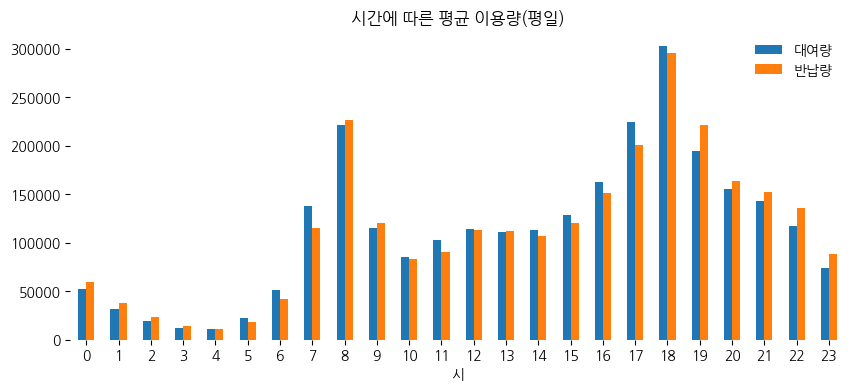

In [118]:
# 평일

ax = pd.DataFrame(
    data={
        "대여량": df_2022[df_2022['대여요일'] < 5].groupby('대여시간').size() // 5,
        "반납량": df_2022[df_2022['대여요일'] < 5].groupby('반납시간').size() // 5
    }
).plot.bar(
    rot=0,
    xlabel="시",
    title="시간에 따른 평균 이용량(평일)",
    figsize=(10, 4)
)
ax.set_frame_on(False)
ax.legend(frameon=False)



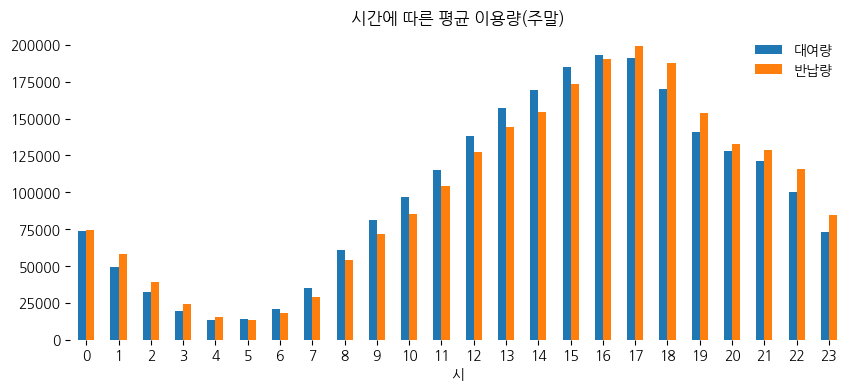

In [119]:
# 주말

ax = pd.DataFrame(
    data={
        "대여량": df_2022[df_2022['대여요일'] >= 5].groupby('대여시간').size() // 2,
        "반납량": df_2022[df_2022['대여요일'] >= 5].groupby('반납시간').size() // 2
    }
).plot.bar(
    rot=0,
    xlabel="시",
    title="시간에 따른 평균 이용량(주말)",
    figsize=(10, 4)
)
ax.set_frame_on(False)
ax.legend(frameon=False);

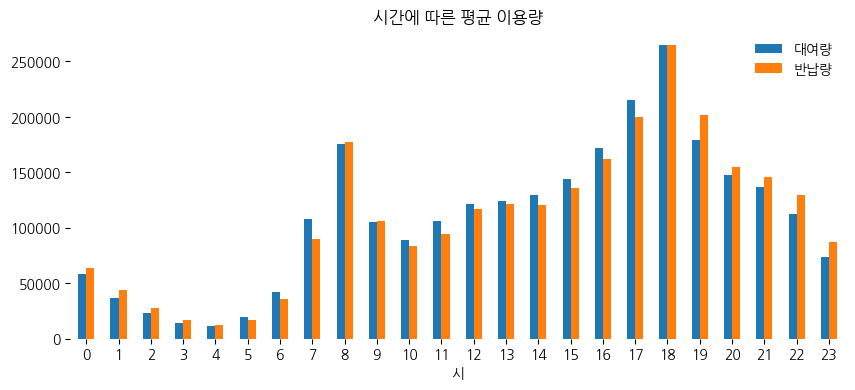

In [117]:
# 시간대별 이용량 살펴보기
ax = pd.DataFrame(
    data={
        "대여량": df_2022.groupby('대여시간').size() // 7,
        "반납량": df_2022.groupby('반납시간').size() // 7
    }
).plot.bar(
    rot=0,
    xlabel="시",
    title="시간에 따른 평균 이용량(주 전체)",
    figsize=(10, 4)
)
ax.set_frame_on(False)
ax.legend(frameon=False);

평일의 경우, 대여/반납 시간대가 모두 8시와 18시에 몰려있다. 주로 출퇴근 시간에 몰린듯 하다.

주말의 경우, 밤시간대로 갈수록 몰린다. 주로 18시 전후로 최고치를 찍는다.

한편, 출근시간 제외하고, 일반적으로 낮에는 대여량 > 반납량이고, 밤에는 그 반대다.

## 평일에서의 시간대별 사용량을 살펴보자!

In [124]:
### 거치소 dataframe
rental_df=pd.read_csv('./rental_spot.csv',low_memory=False,encoding='cp949')
del rental_df['LCD']
del rental_df['QR']
rental_df_gu=rental_df[['대여소번호','자치구']]
rental_df_gu.columns=['대여대여소','대여지역']
rental_df_gu

,대여대여소,대여지역
0,102,마포구
1,103,마포구
2,104,마포구
3,105,마포구
4,106,마포구
...,...,...
2648,5851,영등포구
2649,5852,영등포구
2650,5853,영등포구
2651,5854,영등포구


In [130]:
rental_df_gu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대여대여소   2653 non-null   int64 
 1   대여지역    2653 non-null   object
dtypes: int64(1), object(1)
memory usage: 41.6+ KB


In [155]:
df_2022.tail(100)

,대여일시,대여대여소,대여대여소이름,대여거치대,반납일시,반납대여소,반납대여소이름,반납거치대,이용시간,이용거리
18274663,2022-06-16 19:13:38,1853,서울디자인직업전문학교 앞,0,2022-06-16 19:52:12,5852,대림동현대2차 201동 앞,0,38,4269.48
18274664,2022-06-16 19:55:21,251,서울지방병무청 버스정류장,0,2022-06-16 20:40:11,5852,대림동현대2차 201동 앞,0,44,6790.00
18274665,2022-06-16 22:51:32,1912,한신휴아파트 앞,0,2022-06-16 23:04:04,5852,대림동현대2차 201동 앞,0,12,0.00
18274666,2022-06-17 01:21:38,1913,구로리공원,0,2022-06-17 01:31:46,5852,대림동현대2차 201동 앞,0,10,1340.34
18274667,2022-06-17 08:06:20,731,서울시 도로환경관리센터,0,2022-06-17 08:24:51,5852,대림동현대2차 201동 앞,0,18,4470.00
...,...,...,...,...,...,...,...,...,...,...
18274758,2022-06-28 21:21:40,255,도림사거리,0,2022-06-28 21:28:13,5852,대림동현대2차 201동 앞,0,6,846.63
18274759,2022-06-29 02:53:22,281,신동아아파트 앞,99,2022-06-29 02:59:24,5852,대림동현대2차 201동 앞,99,6,620.00
18274760,2022-06-29 10:15:15,1961,신도림테크노근린공원,0,2022-06-29 10:20:31,5852,대림동현대2차 201동 앞,0,5,750.51
18274761,2022-06-29 14:49:09,1961,신도림테크노근린공원,0,2022-06-29 15:49:09,5852,대림동현대2차 201동 앞,0,60,820.00


In [152]:
### 2022 dataframe과 대여소번호를 key로 삼아 자치구만 추가해주기
df_2022_gu=pd.merge(left = df_2022 , right = rental_df_gu, how = "outer", on = "대여대여소")


In [156]:
df_2022_gu.tail(100)

,대여일시,대여대여소,대여대여소이름,대여거치대,반납일시,반납대여소,반납대여소이름,반납거치대,이용시간,이용거리,대여지역
18271715,2022-06-21 17:47:06,4902,3645 구역삼세무서 교차로,0.0,2022-06-21 18:59:00,4559.0,신길역 2번출구,0.0,71.0,17353.37,강남구
18271716,2022-06-24 17:46:44,4902,3645 구역삼세무서 교차로,0.0,2022-06-24 18:49:07,4559.0,신길역 2번출구,0.0,62.0,12714.53,강남구
18271717,2022-06-28 19:12:07,4902,3645 구역삼세무서 교차로,0.0,2022-06-28 20:13:19,4603.0,한강GS에클라트 건너편 교통섬,0.0,61.0,11630.00,강남구
18271718,2022-06-03 22:35:22,4902,3645 구역삼세무서 교차로,0.0,2022-06-03 23:03:46,4863.0,잠실나들목5,0.0,28.0,4660.00,강남구
18271719,2022-06-12 03:23:40,4902,3645 구역삼세무서 교차로,99.0,2022-06-12 04:01:05,4876.0,삼전동주민센터 앞,99.0,37.0,6790.00,강남구
...,...,...,...,...,...,...,...,...,...,...,...
18271810,NaN,5752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구
18271811,NaN,5753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구
18271812,NaN,5853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,영등포구
18271813,NaN,5854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,영등포구


In [120]:
_df = df_2022[df_2022['대여요일'] < 5].groupby(['대여지역', '대여시간']).size() // 5
_df

KeyError: '대여지역'

In [16]:
df_return_group = df_2022.groupby(["반납대여소이름","반납대여소"])["반납일시"].count()
df_return = pd.DataFrame(df_return_group).reset_index()
df_return.columns = ["반납대여소이름","반납대여소", "반납수"]
df_return

,반납대여소이름,반납대여소,반납수
0,(시립)고덕평생학습관,1070,3529
1,(재)FITI시험연구원,2724,9016
2,3645 구역삼세무서 교차로,4902,1814
3,3919 CGV구로 앞,3886,5835
4,3호선 매봉역 3번출구앞,2335,10406
...,...,...,...
2627,흥국사 정류장,991,819
2628,희성오피앙,1639,7217
2629,희훈타워빌 앞,3905,9409
2630,힐스테이트에코,2720,20033


In [38]:
# df_207=rental_df[rental_df['대여소번호']==207]
# df_207_lat=df_207.iloc[0]['위도']
# df_207_lon=df_207.iloc[0]['경도']
# print('위도: {0} ,경도: {1}'.format(df_207_lat,df_207_lon))

위도: 37.52715683 ,경도: 126.9319


In [95]:
near_df_207=rental_df.loc[(rental_df['자치구']=='영등포구') & (rental_df['위도']<37.54) & (rental_df['위도']>37.52)& (rental_df['경도']>126.92) & (rental_df['경도']<126.95)]
near_df_207.shape

(23, 7)

In [ ]:
for row in near_df_207.itertuples():
    print(row)

In [97]:
near_df_207.head()

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,거치대개수
84,201,진미파라곤 앞,영등포구,서울특별시 영등포구 국회대로76길 10,37.531239,126.921333,15
85,202,국민일보 앞,영등포구,서울특별시 영등포구 여의공원로 101,37.528816,126.924530,30
88,205,산업은행 앞,영등포구,서울특별시 영등포구 의사당대로 97,37.526264,126.920509,20
90,207,여의나루역 1번출구 앞,영등포구,서울특별시 영등포구 여의동로 지하343,37.527157,126.931900,46
91,209,유진투자증권빌딩 앞,영등포구,서울특별시 영등포구 국제금융로 24,37.524612,126.927834,12


In [99]:
# 지도의 중심 찾기
from folium.plugins import MarkerCluster

lat=rental_df['위도'].mean()
long=rental_df['경도'].mean()
myMap = folium.Map([lat, long], zoom_start = 9)

coords = []
for i in range(len(rental_df)-1):
    x = rental_df['위도'][i]
    y = rental_df['경도'][i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Circle(
        location = coords[i],
        radius = 150,
        color = '#000000',
        fill = 'crimson',
    ).add_to(myMap)
    
folium.Marker([37.527157, 126.9319],
  popup="여의나루역 1번출구 앞",
  icon=folium.Icon(color='green', icon='fa-bicycle',prefix='fa')).add_to(myMap)

folium.CircleMarker([37.527157, 126.9319],
  radius=100,
  color='blue',
  fill_color='skyblue').add_to(myMap)

def plot(df):
    # 리스트를 이용해 여러 행의 데이터를 위,경도로 묶음
    locations = list(zip(df.위도, df.경도))
    # 반복문을 이용해 locations로 정의한 변수에 해당하는 위치에 자동차 모양의 빨간색 아이콘을 지정했다.
    icons = [folium.Icon(icon='fa-bicycle', prefix="fa", color="blue") for _ in range(len(locations))]

    # 역시 같은 원리로 아이콘을 클릭했을 때, 팝업이 생성되게 할 예정인데, 먼저 팝업 안에 들어갈 내용을 지정한다.
    popup_content = []
    for information in df.itertuples():
        # 팝업을 클릭했을 때, 시간이 나오게 하고 싶다.
        # datetime 컬럼을 pd.to_datetime 기능을 활용하여 hh:mm 포맷으로 time이라는 컬럼을 사전에 미리 만들었다.
        content = "<b>대여소번호 :{}</b>  <br /> 대여소명: {}".format(information.대여소번호, information._2)
        popup_content.append(content)

    # 팝업을 생성한다.
    popups = [folium.Popup(content, min_width=300, max_width=300) for content in popup_content]

    # 클러스터를 생성하여 앞에서 지정한 locations, icons, popups를 설정해준다.
    cluster = MarkerCluster(locations = locations, icons = icons, popups = popups,)
    # 지도에 클러스터를 추가.
    cluster.add_to(myMap)
    
plot(near_df_207)
myMap.save('index.html')

In [147]:
# 대여량이 많은 상위 대여소 
# for i in range(5):
#     print('반납량 많은 상위 대여소 top 10\n',df[i]['반납대여소이름'].value_counts().head(5))
print('반납량 많은 상위 대여소 top 10\n',df_return.sort_values('반납수',ascending=False))

반납량 많은 상위 대여소 top 10
             반납대여소이름  반납대여소    반납수
778   뚝섬유원지역 1번출구 앞    502  81191
2454     한강공원 망원나들목   4217  75121
1831   여의나루역 1번출구 앞    207  67325
834     마곡나루역 2번 출구   2715  65651
1110        봉림교 교통섬   2102  52390
...             ...    ...    ...
2042          위트콤공장     11      4
2398        테스트 대여소   9979      3
2041            위트콤     10      3
1252         상암단말정비  99998      2
100           _도봉센터   9990      1

[2632 rows x 3 columns]


## 2018 전처리 한거 좀 column에 작은따옴표 붙어있음

In [98]:
print(df[4]['대여대여소이름'].dtypes)
df[4]['대여대여소이름']=df[4]['대여대여소이름'].astype('object')
df[4]['대여대여소이름']=df[4]['대여대여소이름'].str.replace("'","")
#2018
df[4].head()
df[4]['대여대여소이름']=df[4]['대여대여소이름'].str.strip()